In [11]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [34]:
import keras

fashion_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']


11490434/11490434 [==============================] - 0s 0us/step


In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
len(train_labels)

60000

In [37]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
test_images.shape

(10000, 28, 28)

In [39]:
len(test_labels)

10000

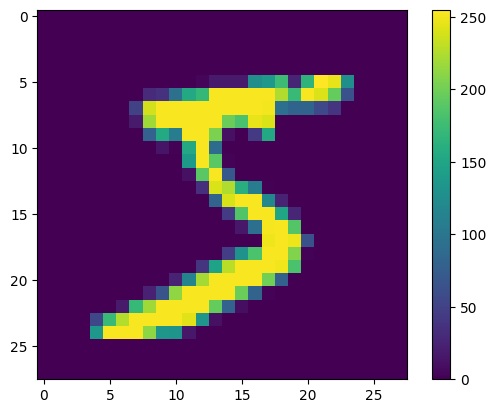

In [40]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [41]:
train_images = train_images / 255.0

test_images = test_images / 255.0

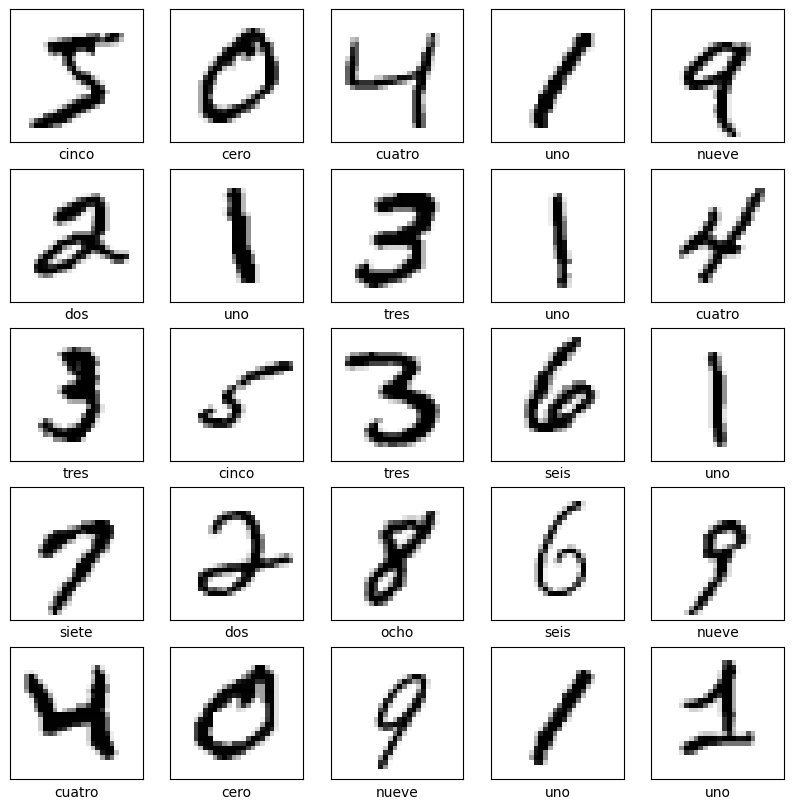

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2495 - accuracy: 0.9285
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1124 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0765 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0575 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0441 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0271 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0219 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 

In [46]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0885 - accuracy: 0.9739 - 675ms/epoch - 2ms/step

Test accuracy: 0.9739000201225281


In [47]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [48]:
predictions[0]

array([3.2689853e-09, 4.5783977e-14, 2.1494754e-08, 2.4715916e-07,
       4.0250747e-15, 3.0751430e-12, 1.4406856e-16, 9.9999970e-01,
       3.5854226e-11, 2.6600359e-08], dtype=float32)

In [49]:
np.argmax(predictions[0])

7

In [50]:
test_labels[0]

7

In [51]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

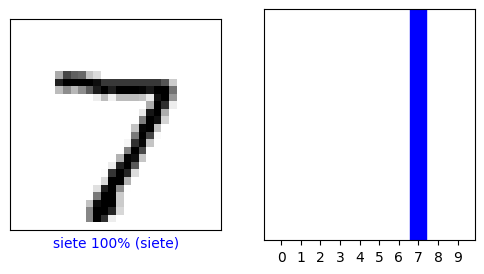

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

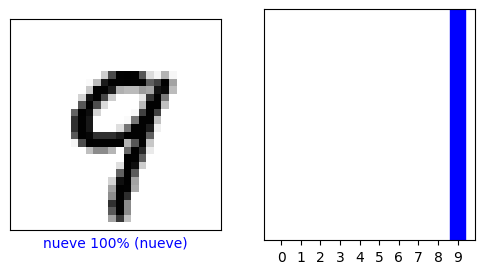

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

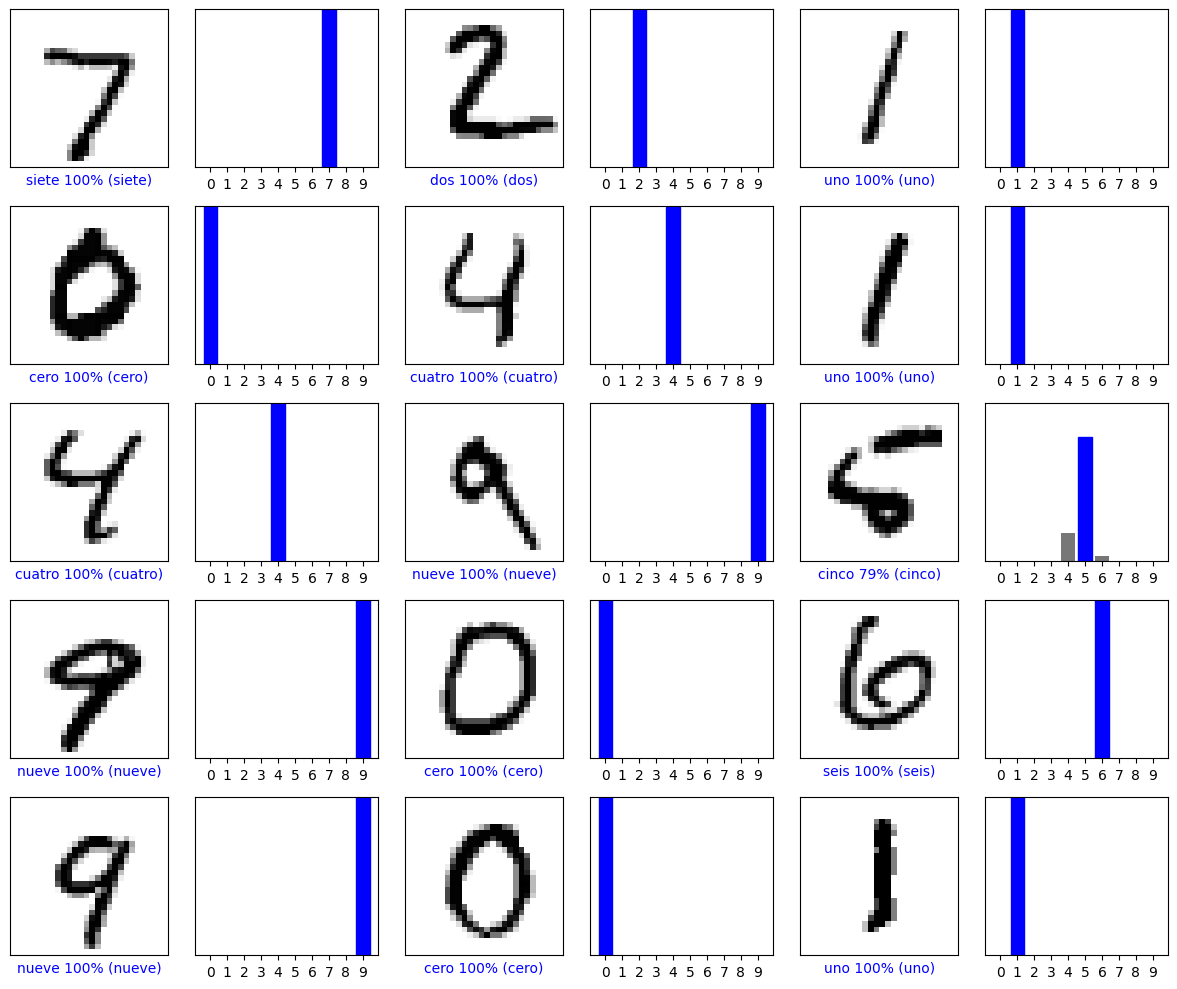

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [58]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 220ms/step
[[1.5817243e-10 2.1733295e-07 9.9999976e-01 2.9536564e-11 1.2512006e-19
  7.7728258e-12 2.4579924e-08 2.6109761e-15 3.7292489e-09 1.0345971e-14]]


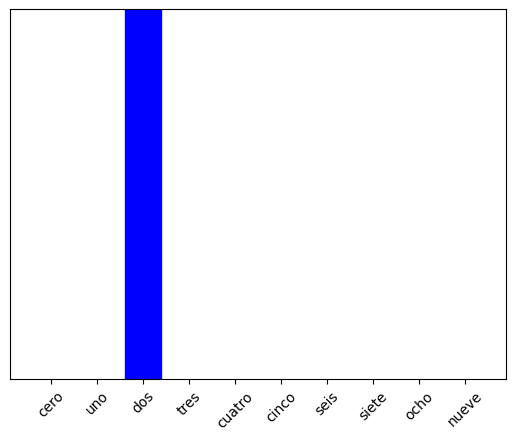

In [59]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [60]:
np.argmax(predictions_single[0])

2

In [61]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.